## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

from skimage.color import rgb2gray


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

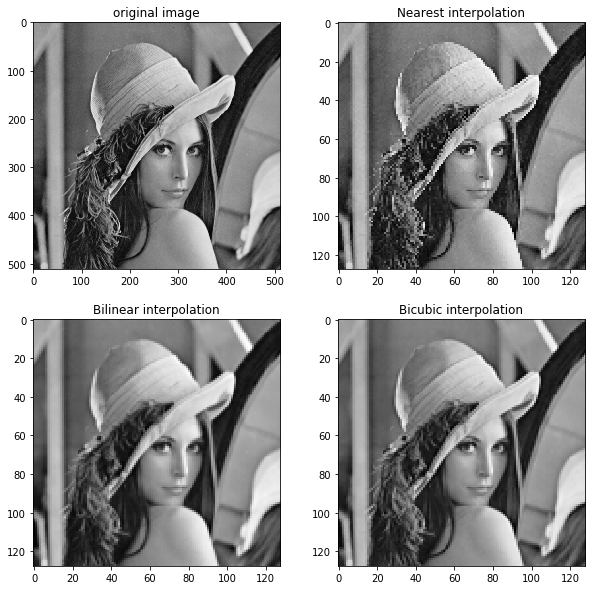

In [2]:
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)
lena_im_float = img_as_float(lena_im)


LenaNearest=misc.imresize(lena_im_float, 25, interp='nearest')
LenaBilinear=misc.imresize(lena_im_float, 25, interp='bilinear')
LenaBicubic=misc.imresize(lena_im_float, 25, interp='bicubic')

fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(lena_im_float, cmap=cm.gray)
ax0.set_title('original image')

ax1.imshow(LenaNearest, cmap=cm.gray)
ax1.set_title('Nearest interpolation')


ax2.imshow(LenaBilinear, cmap=cm.gray)
ax2.set_title('Bilinear interpolation')


ax3.imshow(LenaBicubic, cmap=cm.gray)
ax3.set_title('Bicubic interpolation')

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


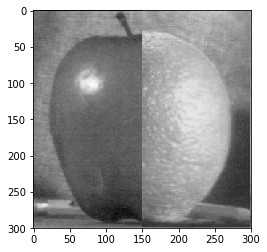

In [3]:
def simple_blend (img1, img2, t): #i suppose that these 2 images are of the same size (i can resize later)
    img_bl = img1
    for i in range(0,img1.shape[0]-1):
        for j in range(0,img1.shape[1]-1):
            img_bl[i,j]=img1[i,j] if (j < t) else img2[i,j]
    return img_bl

filename = './images/apple.jpeg'
apple = io.imread(filename)
apple = img_as_float(apple)
apple= rgb2gray(apple)

filename = './images/orange.jpeg'
orange = io.imread(filename)
orange = img_as_float(orange)
orange = rgb2gray(orange)

orangeAppleSimple=simple_blend(apple, orange, 150)

plt.imshow(orangeAppleSimple, cmap=cm.gray)

[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179]
[ 1.          0.98333333  0.96666667  0.95        0.93333333  0.91666667
  0.9         0.88333333  0.86666667  0.85        0.83333333  0.81666667
  0.8         0.78333333  0.76666667  0.75        0.73333333  0.71666667
  0.7         0.68333333  0.66666667  0.65        0.63333333  0.61666667
  0.6         0.58333333  0.56666667  0.55        0.53333333  0.51666667
  0.5         0.48333333  0.46666667  0.45        0.43333333  0.41666667
  0.4         0.38333333  0.36666667  0.35        0.33333333  0.31666667
  0.3         0.28333333  0.26666667  0.25        0.23333333  0.21666667
  0.2         0.18333333  0.16666667  0.15        0.13333333  0.11666667
  0.1         0.08333333  0.06666667  0.05        0.03333333  0.01666667]


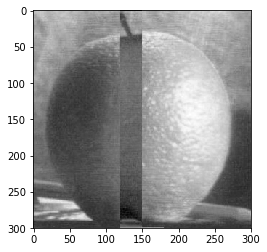

In [12]:
def alpha_blend (img1, img2, window):
    x1 = int(img1.shape[1]/2)-window
    x2 = int(img1.shape[1]/2)+window
    x = np.arange(x1, x2)
    print(x)
    alpha = (x-x2)/(x1 - x2)
    img_bl_alpha = simple_blend(img1, img2, img1.shape[1]/2)
    print(alpha)
    img_bl_alpha[:, x1:x2] = alpha* img1[:, x1:x2] + (1- alpha)* img2[:, x1:x2]
    return img_bl_alpha



orangeAppleAlpha=alpha_blend(orange, apple, 30)
plt.figure
plt.imshow(orangeAppleAlpha, cmap=plt.cm.gray)
plt.show()

#i'm sorry, i don't know why it looks that awful




C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


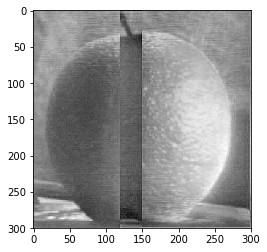

In [23]:
def colapse_pyramid(pyramid):
    Layer = len(pyramid)-1
    L = pyramid[Layer]
    while Layer != 0:      
        upscalePyramid = transform.rescale(L,2) 
        if upscalePyramid.shape == pyramid[Layer-1].shape:
            L = upscalePyramid + pyramid[Layer-1]
            Layer = Layer -1
        else:
            L = upscalePyramid[:pyramid[Layer-1].shape[0], :pyramid[Layer-1].shape[1]] + pyramid[Layer-1]
            Layer = Layer -1
    colapse_image = L         
    return colapse_image

def pyramid_blend(img1,img2):
    mask = np.zeros(img1.shape)
    mask[:, :int(img1.shape[1]/2)] = 1
    
    # generate Gaussian pyramid for image1
    from skimage.transform import pyramid_gaussian
    pGimg1 = pyramid_gaussian(img1, downscale = 2)

    # generate Gaussian pyramid for image2
    pGimg2 = pyramid_gaussian(img2, downscale = 2)

    # generate Laplacian Pyramid
    from skimage.transform import pyramid_laplacian
    pLimg1 = tuple(pyramid_laplacian(img1, downscale = 2))
    pLimg2 = tuple(pyramid_laplacian(img2, downscale = 2))
    
    mask_GP = tuple(pyramid_gaussian(mask, downscale=2))
    mask_GP = [a for a in mask_GP]
    
    Blend_pyramid = []
    for i in range(0, len(mask_GP)):
        Blend_pyramid.append(pLimg1[i]*mask_GP[i] + pLimg2[i]*(1 - mask_GP[i]))
        
    
    blend_img = colapse_pyramid(Blend_pyramid)
    
    return blend_img



blendpyr = pyramid_blend(orange, apple)
plt.imshow(blendpyr, cmap = cm.gray)